Problem Statement:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Dataset :https://www.kaggle.com/sdolezel/black-friday(Dataset Description link is found in about this file)

Data Description
Variable : Definition
User_ID : User ID
Product_ID : Product ID
Gender : Sex of User
Age : Age in bins
Occupation : Occupation (Masked)
City_Category : Category of the City (A,B,C)
Stay_In_Current_City_Years: Number of years stay in current city
Marital_Status: Marital Status
Product_Category_1: Product Category (Masked)
Product_Category_2 : Product may belongs to other category also (Masked)
Product_Category_3: Product may belongs to other category also (Masked)
Purchase : Purchase Amount (Target Variable)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##loading the dataset and reading using pandas
df_train=pd.read_csv('C:/Users/CHANDU/Downloads/10479_14692_bundle_archive/train.csv')

In [3]:
#displaying the first values in the dataset
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train.shape

(550068, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#finding the count of null values in each column
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df_test=pd.read_csv('C:/Users/CHANDU/Downloads/10479_14692_bundle_archive/test.csv')

In [8]:
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
df_test.shape

(233599, 11)

In [10]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Here the data is seperated in two files but its better to combine and perform analytics.By combining both we can overcome the repetition of twice the same code, for both datasets.Combine them into a dataframe datawith a root column specifying where each observation belongs(Below the root column is mentioned as type).Later after performing preprocessing and all we can bring back our data to original.

In [11]:
#rootcolumn(column is type) specifying where each observation belongs
df_train['type'] = 'train'
df_test['type'] = 'test'

In [12]:
#combining both the datasets using append function
df = df_train.append(df_test, sort=False)

In [13]:
#finding the shape(rows and cols) of the dataset
df.shape

(783667, 13)

In [14]:
#displaying the last ten records in the dataset
df.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,type
233589,1006030,P00241442,M,26-35,17,C,1,1,2,15.0,NaN,NaN,test
233590,1006032,P00252442,M,46-50,7,A,3,0,8,NaN,NaN,NaN,test
233591,1006033,P00127642,M,51-55,13,B,1,1,1,2.0,15.0,NaN,test
233592,1006035,P00135742,F,26-35,1,C,3,0,6,8.0,NaN,NaN,test
233593,1006036,P00255442,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN,test


we can notice that we got some missing values in the data(purchase column of the test data).No need to panic we have seen intially that purchase column is not mentioned in the test data(df_test).hence that is the target which we need to predict by training the model using the training dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  type                        783667 non-null  object 
dtypes: float64(3),

In [16]:
##gives the statistical information the data
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [17]:
#using dtypes we can see the datatypes of each column
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
type                           object
dtype: object

                    Encoding the Categorical Features

In [18]:
#mapping the gender column(to convert the categorical data to numerical data)
df['Gender']=df['Gender'].map({'F':0, 'M':1})
df['Gender'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

In [19]:
##gives all the unique values in the column City_Category
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [20]:
###encoding the categorical columns and droping the first column 
city_cat = pd.get_dummies(df['City_Category'],drop_first=True)
city_cat

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [21]:
##add the encoded categorical features into the dataframe
df = pd.concat([df,city_cat],axis=1)
df.head() # checking the dataset after transformation

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,type,B,C
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0,train,0,0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,train,0,0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0,train,0,0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0,train,0,0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0,train,0,1


In [22]:
df.drop('City_Category',axis=1, inplace=True) 

In [23]:
#checking after the necessary tranformation by displaying the first 5 rows in the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,type,B,C
0,1000001,P00069042,0,0-17,10,2,0,3,NaN,NaN,8370.0,train,0,0
1,1000001,P00248942,0,0-17,10,2,0,1,6.0,14.0,15200.0,train,0,0
2,1000001,P00087842,0,0-17,10,2,0,12,NaN,NaN,1422.0,train,0,0
3,1000001,P00085442,0,0-17,10,2,0,12,14.0,NaN,1057.0,train,0,0
4,1000002,P00285442,1,55+,16,4+,0,8,NaN,NaN,7969.0,train,0,1


In [24]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [25]:
#mapping the age according to the age standards (since the ages are mentioned in the form of intervals)
age_map={'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 }
df['Age'] = df['Age'].map(age_map)
df['Age']

0         1
1         1
2         1
3         1
4         7
         ..
233594    3
233595    3
233596    3
233597    5
233598    5
Name: Age, Length: 783667, dtype: int64

In [26]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,type,B,C
0,1000001,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,train,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,train,0,0
2,1000001,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,train,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,train,0,0
4,1000002,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,train,0,1


In [27]:
df.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,type,B,C
233594,1006036,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,test,1,0
233595,1006036,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,test,1,0
233596,1006036,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,test,1,0
233597,1006037,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,test,0,1
233598,1006039,P00316642,0,5,0,4+,1,4,5.0,NaN,NaN,test,1,0


In [28]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [29]:
# replacing + with blank 
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','')

In [30]:
#converting all the data type into int 
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df['Gender']=df['Gender'].astype(int)

In [31]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int32
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
type                           object
B                               int32
C                               int32
dtype: object

                   We have encoded all the neccessary features required for the model training

                   HANDLING MISSING DATA

In [32]:
#percent of missing data 
percent_of_missing_data = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent_of_missing_data

Product_Category_3            0.696481
Product_Category_2            0.313886
Purchase                      0.298085
C                             0.000000
B                             0.000000
type                          0.000000
Product_Category_1            0.000000
Marital_Status                0.000000
Stay_In_Current_City_Years    0.000000
Occupation                    0.000000
Age                           0.000000
Gender                        0.000000
Product_ID                    0.000000
User_ID                       0.000000
dtype: float64

In [33]:
#finding the unique values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [34]:
#nunique gives the count of the unique values
df['Product_Category_2'].nunique()

17

There are 17 categories in the Product_Category_2(Here, Mean cannot be replaced with the null values).

In [35]:
#finding the value count of the each variable
df['Product_Category_2'].value_counts() 

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [36]:
#finding the mode of the column Product_Category_2
df['Product_Category_2'].mode() 

0    8.0
dtype: float64

In [37]:
#replacing the null values with the mode 
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace = True)

In [38]:
df['Product_Category_2'].isnull().sum()

0

In [39]:
#checking the mode after replacement
df['Product_Category_2'].mode() 

0    8.0
dtype: float64

In [40]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,type,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,NaN,8370.0,train,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,train,0,0
2,1000001,P00087842,0,1,10,2,0,12,8.0,NaN,1422.0,train,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,train,0,0
4,1000002,P00285442,1,7,16,4,0,8,8.0,NaN,7969.0,train,0,1


In [41]:
#here we can clearly notice that the missing value percentage of the Product_Category_3 is almost 70%(  0.696481) so we can drop the feature
df.drop('Product_Category_3',axis=1,inplace=True)

In [42]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,type,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,8370.0,train,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,15200.0,train,0,0
2,1000001,P00087842,0,1,10,2,0,12,8.0,1422.0,train,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,1057.0,train,0,0
4,1000002,P00285442,1,7,16,4,0,8,8.0,7969.0,train,0,1


In [43]:
df.shape

(783667, 13)

    Data Visualization

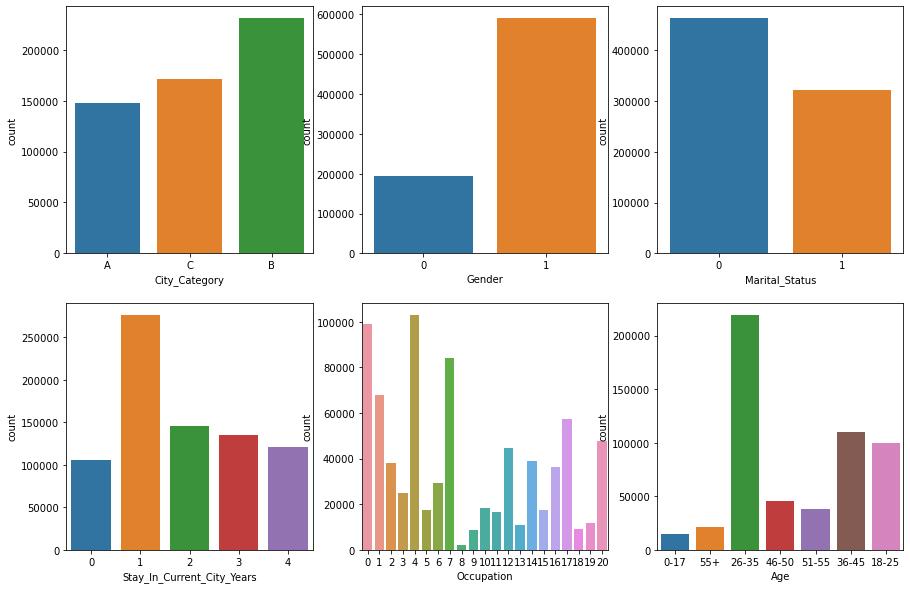

In [44]:
#visualing the count of the features
fig = plt.figure(figsize=(15,10))
fig.add_subplot(231)
sns.countplot(x = 'City_Category', data = df_train)
fig.add_subplot(232)
sns.countplot(x = 'Gender', data = df)
fig.add_subplot(233)
sns.countplot(x = 'Marital_Status', data = df)
fig.add_subplot(234)
sns.countplot(x = 'Stay_In_Current_City_Years', data = df)
fig.add_subplot(235)
sns.countplot(x = 'Occupation', data = df)
fig.add_subplot(236)
sns.countplot(x = 'Age', data = df_train)

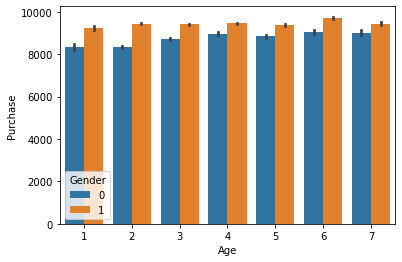

In [45]:
#visualising bar plot age Vs purchase
sns.barplot('Age','Purchase',hue='Gender',data=df)

From the above we can conclude that the purchasing of products of each range of age are almost equal.Hence percentage of purchasing products of men over women is higher.

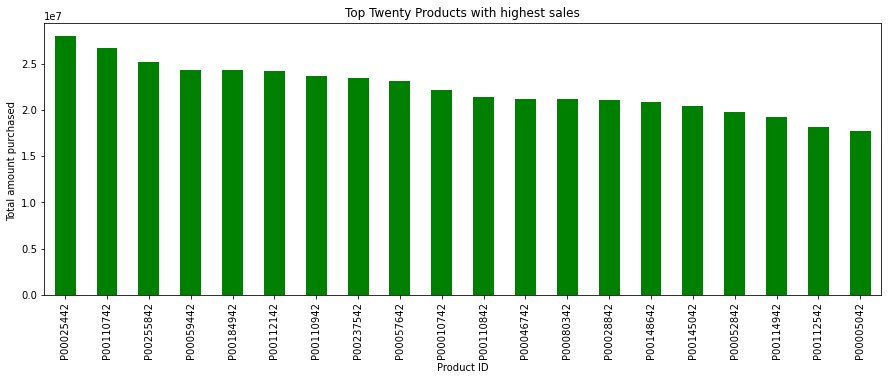

In [46]:
# visualising the top twenty products(prouduct_id) which made the highest sales
data_gen = df.groupby('Product_ID').sum()['Purchase']
plt.figure(figsize=(15,5))
data_gen.sort_values(ascending=False)[0:20].plot(kind='bar',color='green')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased ')
plt.title('Top Twenty Products with highest sales')
plt.show()

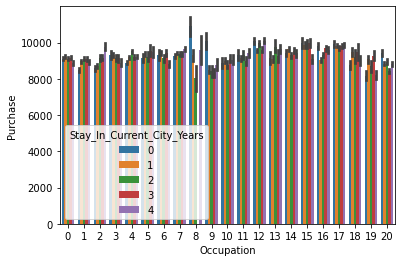

In [47]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df)

From the above plot it is clear that all the occupation contributes nearly equal in purchasing rates and it doesn't impact much that how many years one live's in a city.

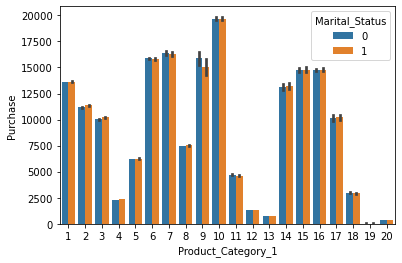

In [48]:
#visualising Product_category1 Vs Purchased
sns.barplot('Product_Category_1','Purchase',hue='Marital_Status',data=df)

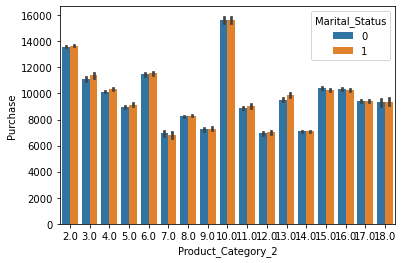

In [49]:
##visualising Product_category2 Vs Purchased
sns.barplot('Product_Category_2','Purchase',hue='Marital_Status',data=df)

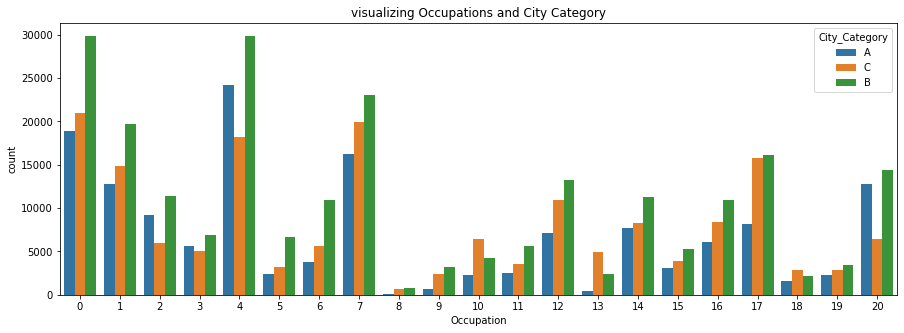

In [50]:
#visualising Occupations vs City Category
plt.figure(figsize=(15,5))
sns.countplot(x='Occupation',data=df_train,hue='City_Category')
plt.title('visualizing Occupations and City Category')
plt.show()

In [51]:
#splitting the data back into train and test as it was already provided
train = df[df['type'] == 'train']
del train['type']
test = df[df['type'] == 'test']
test.drop(['Purchase','type'], axis=1, inplace=True)

D:\INSTALLED_SOFTWARES\envs\PythonCPU\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
#Export the modified(cleaned) files 
train.to_csv("train_mod.csv",index=False)
test.to_csv("test_mod.csv",index=False)

In [53]:
train

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,8370.0,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,15200.0,0,0
2,1000001,P00087842,0,1,10,2,0,12,8.0,1422.0,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4,0,8,8.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,1,1,20,8.0,368.0,1,0
550064,1006035,P00375436,0,3,1,3,0,20,8.0,371.0,0,1
550065,1006036,P00375436,0,3,15,4,1,20,8.0,137.0,1,0
550066,1006038,P00375436,0,7,1,2,0,20,8.0,365.0,0,1


In [54]:
test

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,B,C
0,1000004,P00128942,1,5,7,2,1,1,11.0,1,0
1,1000009,P00113442,1,3,17,0,0,3,5.0,0,1
2,1000010,P00288442,0,4,1,4,1,5,14.0,1,0
3,1000010,P00145342,0,4,1,4,1,4,9.0,1,0
4,1000011,P00053842,0,3,1,1,0,4,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,4,1,8,8.0,1,0
233595,1006036,P00254642,0,3,15,4,1,5,8.0,1,0
233596,1006036,P00031842,0,3,15,4,1,1,5.0,1,0
233597,1006037,P00124742,0,5,1,4,0,10,16.0,0,1


In [55]:
test.shape

(233599, 11)

In [56]:
#splitting the data into X and y
X = train.drop(['Product_ID','User_ID','Purchase'], axis=1)
y = train['Purchase']

In [57]:
X

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,B,C
0,0,1,10,2,0,3,8.0,0,0
1,0,1,10,2,0,1,6.0,0,0
2,0,1,10,2,0,12,8.0,0,0
3,0,1,10,2,0,12,14.0,0,0
4,1,7,16,4,0,8,8.0,0,1
...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,1,0
550064,0,3,1,3,0,20,8.0,0,1
550065,0,3,15,4,1,20,8.0,1,0
550066,0,7,1,2,0,20,8.0,0,1


In [58]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [59]:
#train test split for model building
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=57)
from sklearn.linear_model import LinearRegression

In [60]:
###Building,Predicting and Evaluating the Regression Model
###instantiate the algorithm and fit the model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# Getting the coefficients and intercept
print('coefficients:', lr.coef_)
print('intercept:', lr.intercept_)

coefficients: [ 504.29156306  115.33623919    6.1358545    12.88232602  -38.94838658
 -421.84370116  -43.2331513   174.93912878  713.50431104]
intercept: 10808.439762884123


In [62]:
#Predicting on the test data
y_pred = lr.predict(X_test)
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 4680.930800024534


                       RandomForestRegressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100, max_depth = 15, max_features = 'auto', min_samples_leaf =15, min_samples_split=100 )

In [64]:
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
y_pred= rf.predict(X_test)
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 2938.2546594364744


                        LGBMRegressor

In [66]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=1000,max_depth=50,learning_rate=0.05)
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 2910.5221993824252


In [67]:
## Droppping User_id , Product_id and purchase columns( Number of attributes(columns) used to train the model must match with the input)
predicted= test[['User_ID','Product_ID']]
test =test.drop(['User_ID','Product_ID'],axis=1)

Predictions On the test data with the model which performed best (ie lgbm) and exporting to the predicted file

In [68]:
test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,B,C
0,1,5,7,2,1,1,11.0,1,0
1,1,3,17,0,0,3,5.0,0,1
2,0,4,1,4,1,5,14.0,1,0
3,0,4,1,4,1,4,9.0,1,0
4,0,3,1,1,0,4,5.0,0,1


In [69]:
test_pred = lgbm.predict(test)
test_pred

array([15191.2453819 , 11063.20115334,  6525.99405969, ...,
       12436.30621282, 20452.9568053 ,  2357.6188501 ])

In [70]:
predicted['Purchase']=test_pred

D:\INSTALLED_SOFTWARES\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
predicted.head(25)

,User_ID,Product_ID,Purchase
0,1000004,P00128942,15191.245382
1,1000009,P00113442,11063.201153
2,1000010,P00288442,6525.994060
3,1000010,P00145342,2823.112999
4,1000011,P00053842,2357.550213
5,1000013,P00350442,11359.167300
6,1000013,P00155442,13648.195338
7,1000013,P0094542,11317.238669
8,1000015,P00161842,19045.531434
9,1000022,P00067942,5525.861966


In [72]:
predicted = predicted[['Purchase','User_ID','Product_ID']]
predicted

,Purchase,User_ID,Product_ID
0,15191.245382,1000004,P00128942
1,11063.201153,1000009,P00113442
2,6525.994060,1000010,P00288442
3,2823.112999,1000010,P00145342
4,2357.550213,1000011,P00053842
...,...,...,...
233594,7208.136956,1006036,P00118942
233595,5954.353863,1006036,P00254642
233596,12436.306213,1006036,P00031842
233597,20452.956805,1006037,P00124742


In [73]:
predicted.to_csv("predict.csv",index=False)

From all the above algorithms lgbm algorithm performed the best with low rmse.Lower the rmse value better are the predictions
whereas Linear Regression performed low with poor rmse value

Light GBM:

Light GBM is the robust algorithm which is used when the dataset is extremely large.Here our dataset is large having lakhs of samples. When Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.